**Визуализация продаж магазина с использованием библиотеки seaborn**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/homeworks/supermarket_sales - Sheet1.csv')

In [5]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [6]:
df.shape

(1000, 17)

In [7]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

* столбец Invoice ID для анализа является неактуальным
* прочитав данные, мы видим, что столбец филиал и столбец город несут в себе одну и ту же информацию, т.е. каждый город соответствует одному филиалу, поэтому мы откажемся от столбца город и будем рассматривать столбец филиал для eda
* столбец дата и столбец время имеют тип object, поэтому мы преобразуем их в соответствующий тип, т.е.в datetime

**Обработка данных**

In [9]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

**Описание признаков**

##### - Attributes Information

- Invoice id: Computer generated sales slip invoice identification number

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $

- Quantity: Number of products purchased by customer

- Tax: 5% tax fee for customer buying

- Total: Total price including tax

- Date: Date of purchase (Record available from January 2019 to March 2019)

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- COGS: Cost of goods sold

- Gross margin percentage: Gross margin percentage
- Gross income: Gross income

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)


In [10]:
df.drop(columns=["Invoice ID","City"],inplace=True)

In [11]:
from datetime import datetime as dt

In [12]:
df["Date"]=pd.to_datetime(df["Date"])
df["Time"]=pd.to_datetime(df["Time"])


In [13]:
df["Month"]=df.Date.dt.month_name()
df["year"]=df.Date.dt.day_of_year
df["Day"]=df.Date.dt.day
df["Day_of_week"]=df.Date.dt.day_name()
df["Hour"]=df.Time.dt.hour

In [14]:
df.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,year,Day,Day_of_week,Hour
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-11-22 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,January,5,5,Saturday,13
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-11-22 10:29:00,Cash,76.40,4.761905,3.8200,9.6,March,67,8,Friday,10
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-11-22 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,March,62,3,Sunday,13
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-11-22 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,January,27,27,Sunday,20
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-11-22 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,February,39,8,Friday,10


**Пропущенные значения**

In [15]:
df.isnull().sum()

Branch                     0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Month                      0
year                       0
Day                        0
Day_of_week                0
Hour                       0
dtype: int64

<Axes: >

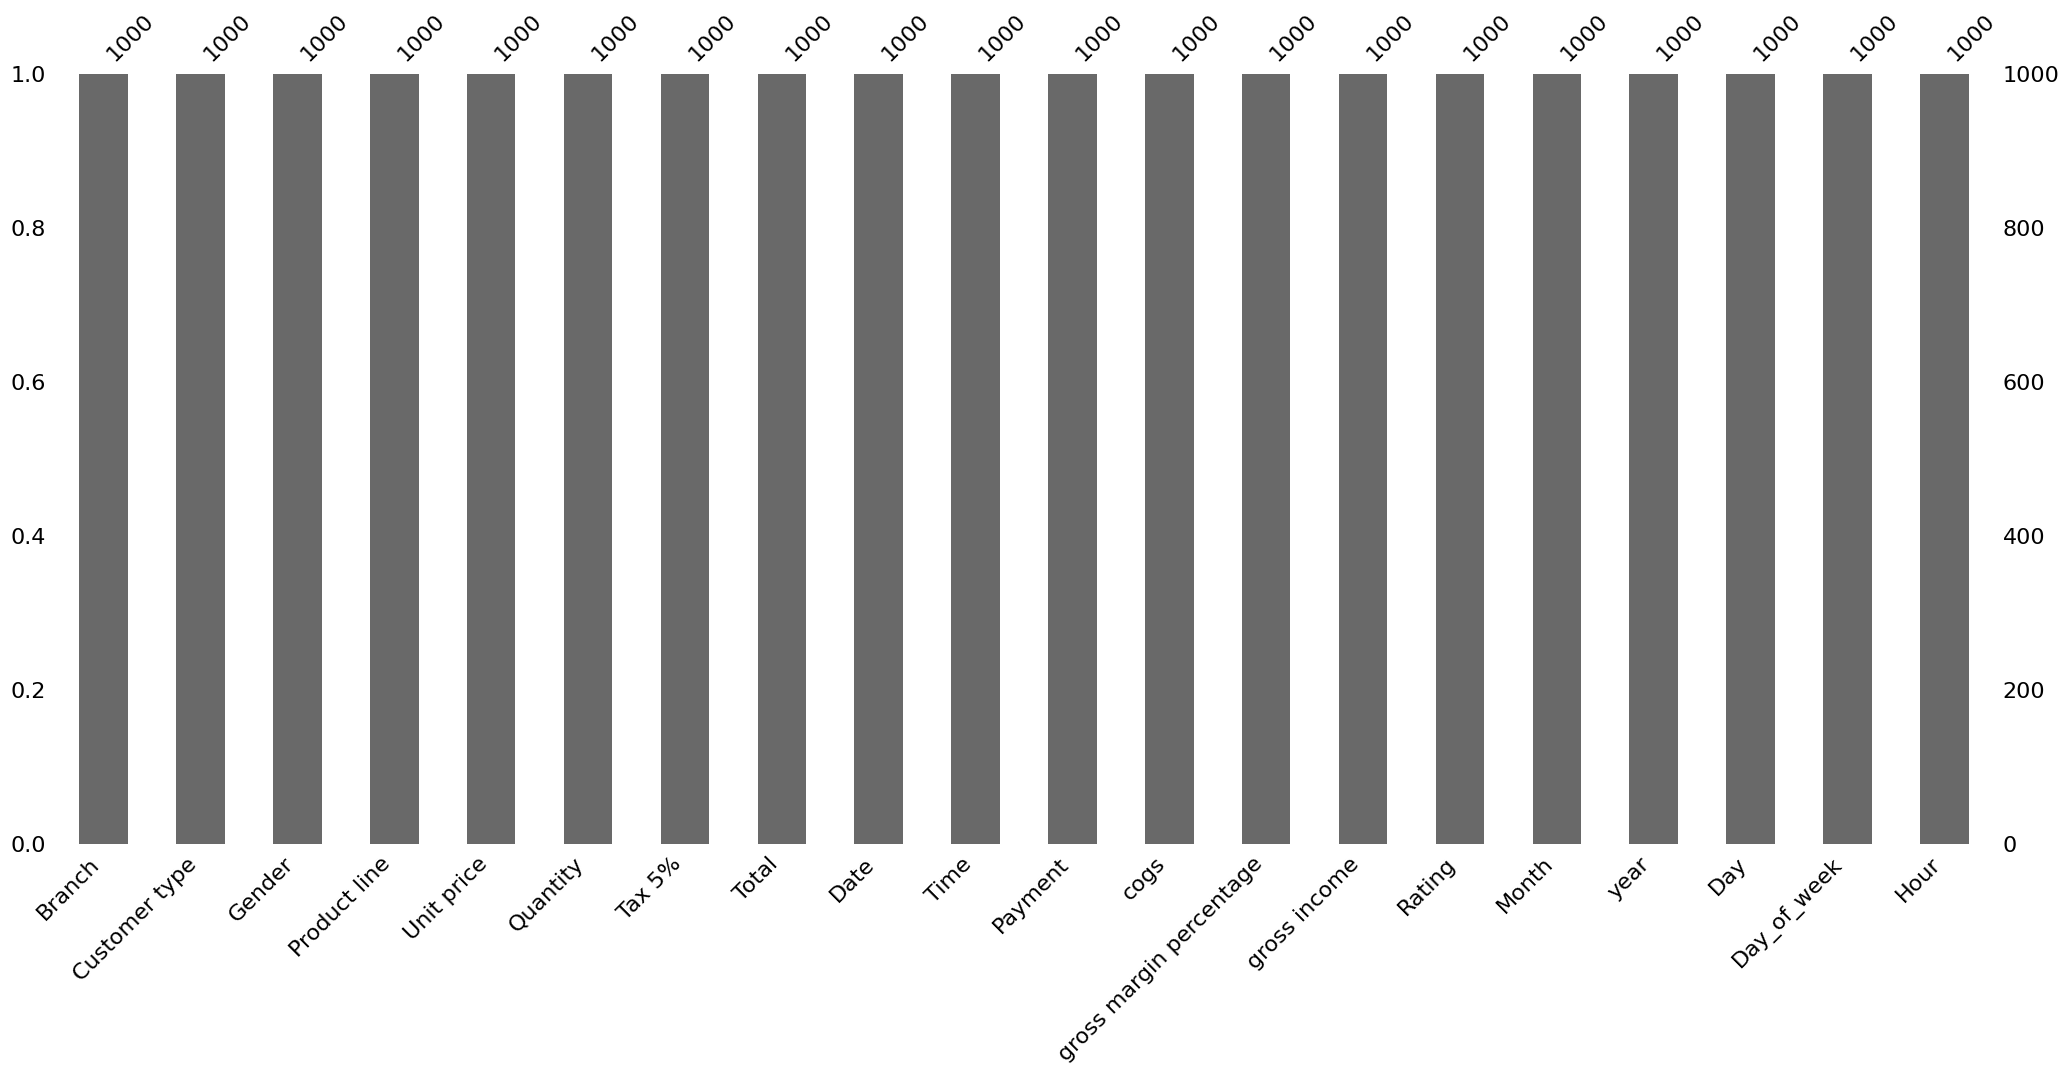

In [16]:
import missingno as msn
msn.bar(df)

Пропущенных значений нет


In [17]:
df_obj=df.select_dtypes(include="object").columns
df_numeric=df.select_dtypes(exclude="object").columns

In [18]:
for i in df_obj:
    print(i,"----------",df[i].unique(),"***********",df[i].nunique())

Branch ---------- ['A' 'C' 'B'] *********** 3
Customer type ---------- ['Member' 'Normal'] *********** 2
Gender ---------- ['Female' 'Male'] *********** 2
Product line ---------- ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories'] *********** 6
Payment ---------- ['Ewallet' 'Cash' 'Credit card'] *********** 3
Month ---------- ['January' 'March' 'February'] *********** 3
Day_of_week ---------- ['Saturday' 'Friday' 'Sunday' 'Monday' 'Thursday' 'Wednesday' 'Tuesday'] *********** 7


In [19]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,year,Day,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,45.004000,15.256000,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,25.122124,8.693563,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000,1.000000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,24.000000,8.000000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,44.000000,15.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,67.000000,23.000000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,89.000000,31.000000,20.000000


**Поиск выбросов**

In [20]:
df_numeric

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'year', 'Day',
       'Hour'],
      dtype='object')

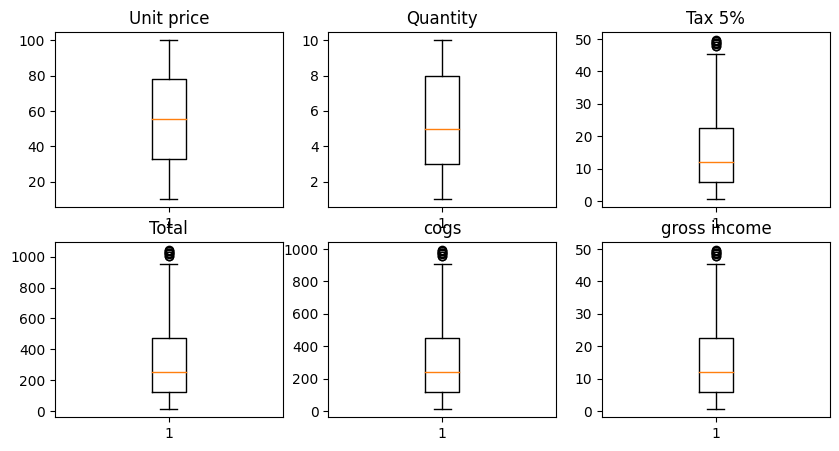

In [21]:
l=["Unit price","Quantity","Tax 5%","Total","cogs","gross income"]
plt.figure(figsize=(10,5))
pos=1
for i in l:
    plt.subplot(2,3,pos)
    plt.boxplot(df[i])
    plt.title(i)
    pos=pos+1


Выбросы присутствуют в 4 признаках

<Axes: >

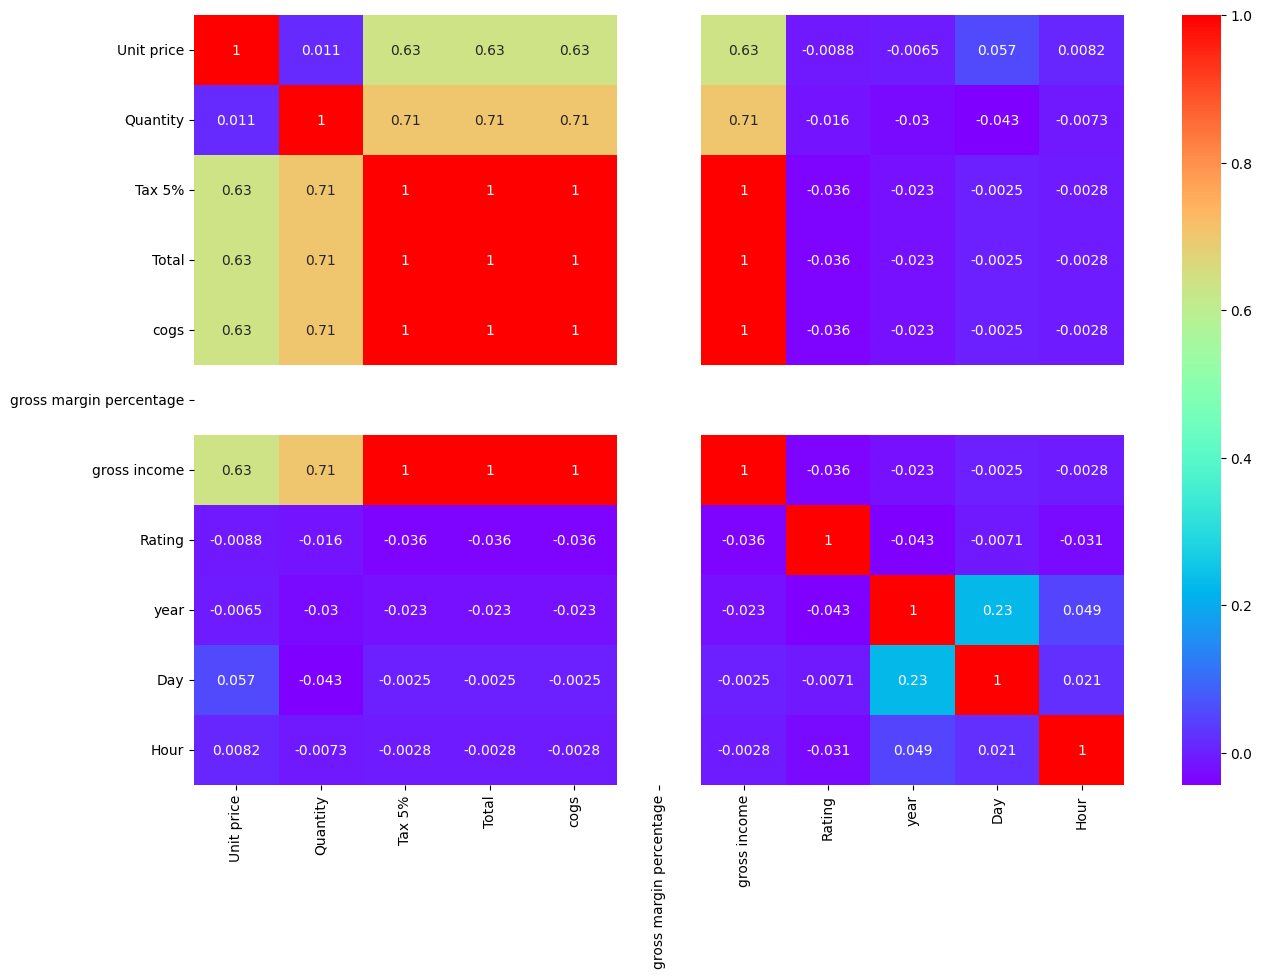

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="rainbow")

Признаки с положительной корреляцией я предлагаю удалить


In [23]:
df.drop(columns=["cogs","gross margin percentage"],inplace=True)

In [24]:
df.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,gross income,Rating,Month,year,Day,Day_of_week,Hour
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-11-22 13:08:00,Ewallet,26.1415,9.1,January,5,5,Saturday,13
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-11-22 10:29:00,Cash,3.8200,9.6,March,67,8,Friday,10
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-11-22 13:23:00,Credit card,16.2155,7.4,March,62,3,Sunday,13
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-11-22 20:33:00,Ewallet,23.2880,8.4,January,27,27,Sunday,20
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-11-22 10:37:00,Ewallet,30.2085,5.3,February,39,8,Friday,10


**Выручка компании**

In [25]:
print("Выручка : ",df["Total"].sum())

Выручка :  322966.749


Продажи с января по март в компании составили 322966.749 долларов

In [26]:
df.groupby(["Branch"])["Total"].agg(["mean","sum"]).sort_values(by="mean",ascending=False)

,mean,sum
Branch,,
C,337.099715,110568.7065
B,319.872506,106197.6720
A,312.354031,106200.3705


Text(0.5, 1.0, 'Средние продажи для филиала')

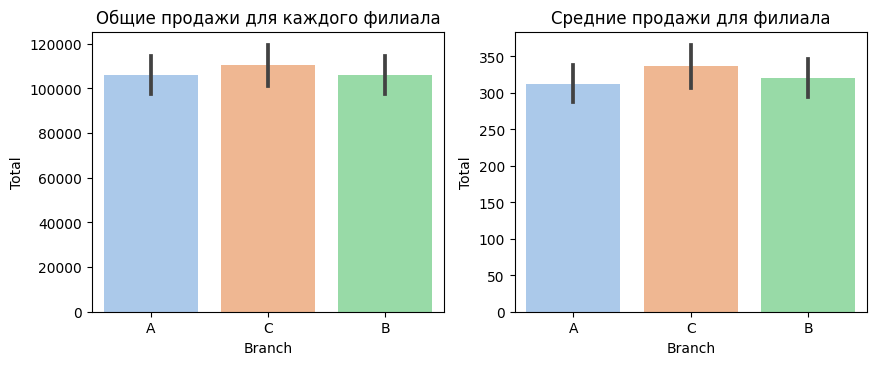

In [27]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.barplot(x="Branch",y="Total",data=df,estimator=sum,palette="pastel")
plt.title("Общие продажи для каждого филиала")
plt.subplot(2,2,2)
sns.barplot(x="Branch",y="Total",data=df,palette="pastel")
plt.title("Средние продажи для филиала")

Из данных можно сделать вывод, что филиал C является самым продаваемым как по среднему объему продаж, так и по общему объему продаж

In [28]:
df[df["Branch"]=="C"]["Total"].max()

1042.65

In [29]:
c=df[df["Branch"]=="C"]
c[c["Total"]==c["Total"].max()].T.rename(columns={350:"values"})

,values
Branch,C
Customer type,Member
Gender,Female
Product line,Fashion accessories
Unit price,99.3
Quantity,10
Tax 5%,49.65
Total,1042.65
Date,2019-02-15 00:00:00
Time,2023-11-22 14:53:00


Найдем лучший месяц продаж:

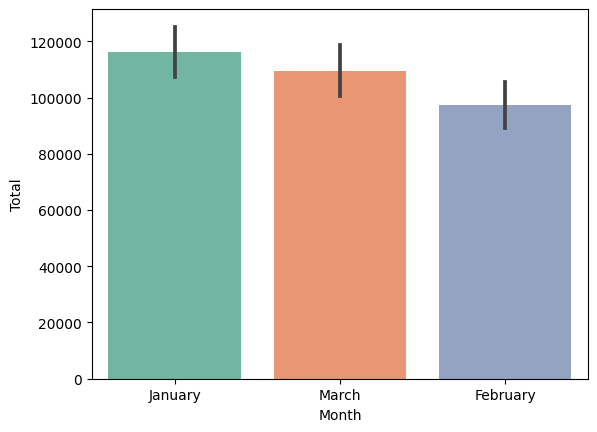

In [30]:
sns.barplot(x="Month",y="Total",data=df,estimator=sum,palette="Set2");

Январь - лучший месяц продаж

In [31]:
df.groupby(["Month"])["Total"].agg(["sum"])

,sum
Month,
February,97219.374
January,116291.868
March,109455.507


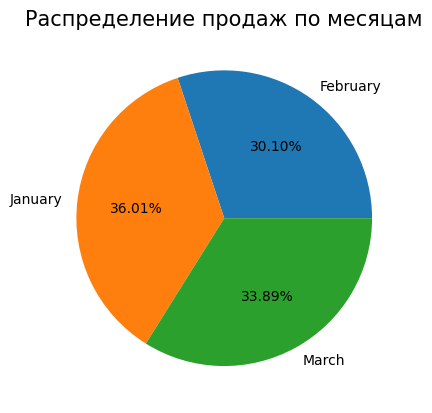

In [32]:
plt.pie(df.groupby(["Month"])["Total"].agg(["sum"])["sum"],labels=df.groupby(["Month"])["Total"].agg(["sum"]).index,autopct="%.2f%%");
plt.title("Распределение продаж по месяцам",fontsize=15);

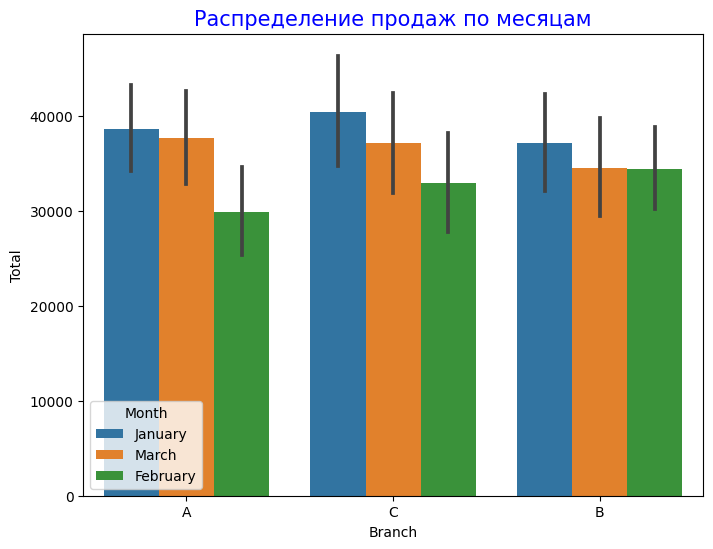

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(x="Branch",y="Total",data=df,estimator="sum",hue="Month")
plt.title("Распределение продаж по месяцам",fontsize=15,color="blue");

## Find the average sale of each branch in each month

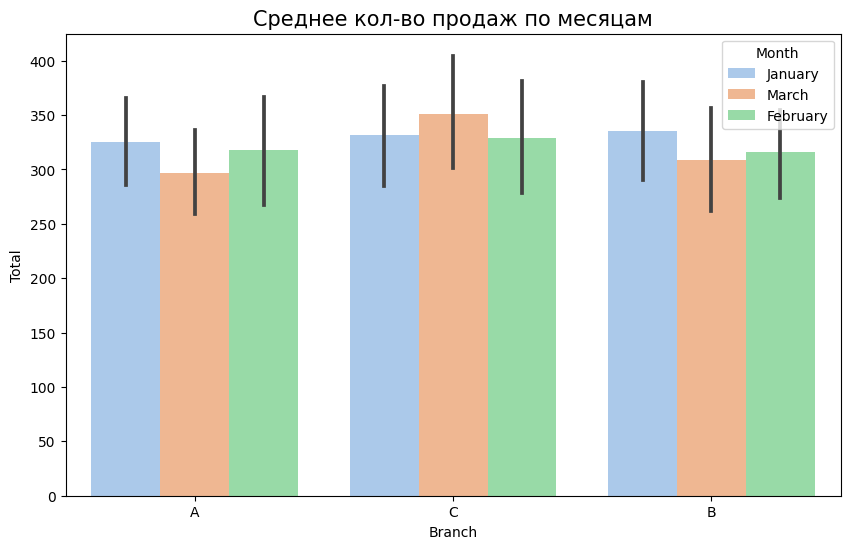

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x="Branch",y="Total",data=df,palette="pastel",hue="Month");
plt.title("Среднее кол-во продаж по месяцам",fontsize=15);

<Figure size 1000x700 with 0 Axes>

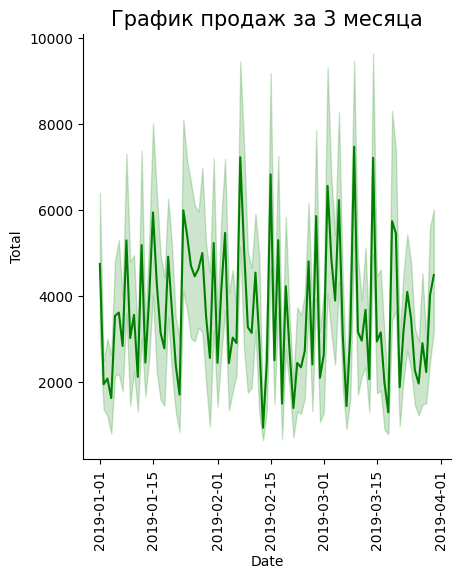

In [35]:
plt.figure(figsize=(10,7))
sns.relplot(x="Date",y="Total",data=df,kind="line",color="green",estimator=sum)
plt.title("График продаж за 3 месяца",fontsize=15)
plt.xticks(rotation=90);

<Figure size 1500x500 with 0 Axes>

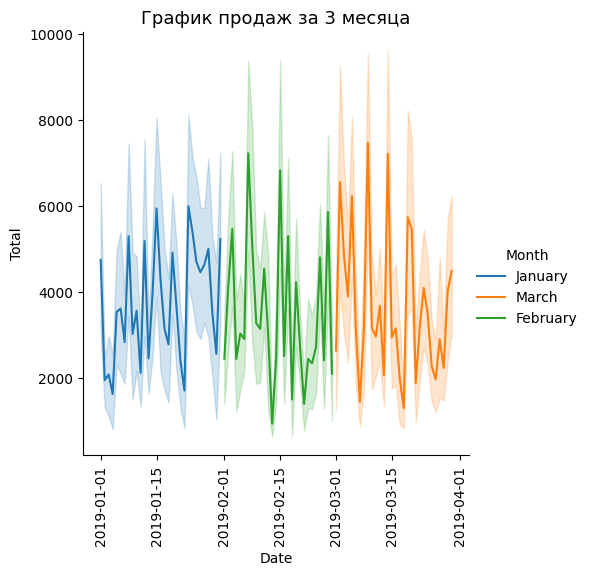

In [36]:
plt.figure(figsize=(15,5))
sns.relplot(x="Date",y="Total",data=df,kind="line",color="green",estimator=sum,hue="Month");
plt.title("График продаж за 3 месяца",fontsize=13)
plt.xticks(rotation=90);

Самая крупная продажа пришлась на март

## Hot Selling Day

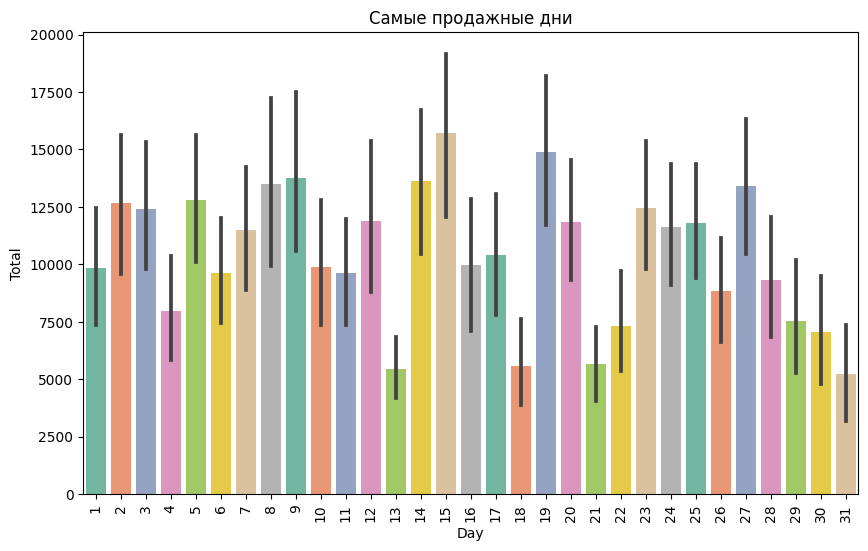

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x="Day",y="Total",data=df,estimator=sum,palette="Set2")
plt.xticks(rotation=90)
plt.title("Самые продажные дни");

На начало месяца приходятся самые стабильные покупки

15 число было самым высоким днем продаж, и, анализируя это, мы должны учитывать, что в середине месяца больше покупателей приходят за покупками, поэтому в каждом отделе должен быть выделен соответствующий персонал и обеспечено наличие товаров.

## Hot selling day of each branch

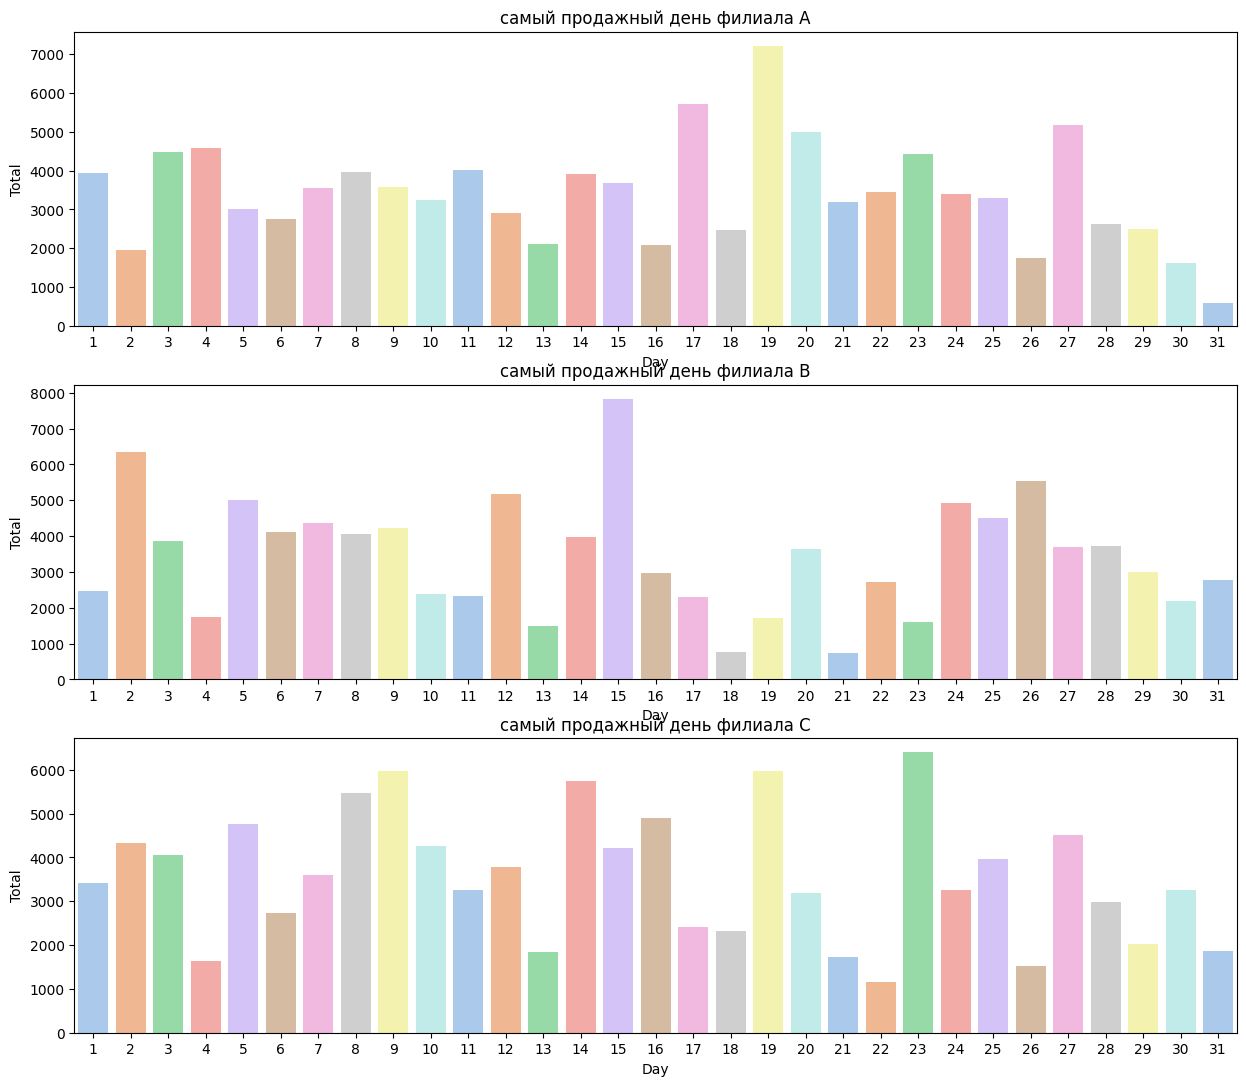

In [38]:
a=df[df["Branch"]=="A"]
b=df[df["Branch"]=="B"]
c=df[df["Branch"]=="C"]
pos=1
l=[a,b,c]
branch=["A","B","C"]
plt.figure(figsize=(15,13))
for i in l:
    plt.subplot(3,1,pos)
    sns.barplot(x="Day",y="Total",data=i,estimator=sum,ci=None,palette="pastel")
    plt.title(f"самый продажный день филиала {branch[pos-1]}")
    pos=pos+1

In [39]:
df["weekend/weekday"]=df["Day_of_week"].apply(lambda x: "weekend" if x=="Saturday" or x=="Sunday" else "weekday")

In [40]:
df.head(3)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,gross income,Rating,Month,year,Day,Day_of_week,Hour,weekend/weekday
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-11-22 13:08:00,Ewallet,26.1415,9.1,January,5,5,Saturday,13,weekend
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-11-22 10:29:00,Cash,3.8200,9.6,March,67,8,Friday,10,weekday
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-11-22 13:23:00,Credit card,16.2155,7.4,March,62,3,Sunday,13,weekend


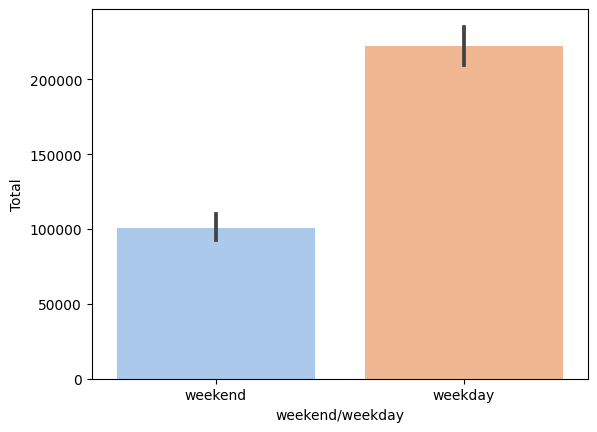

In [41]:
sns.barplot(x="weekend/weekday",y="Total",data=df,estimator=sum,palette="pastel");

Компания должна направлять маркетинговые стратегии на повышение продаж в выходные

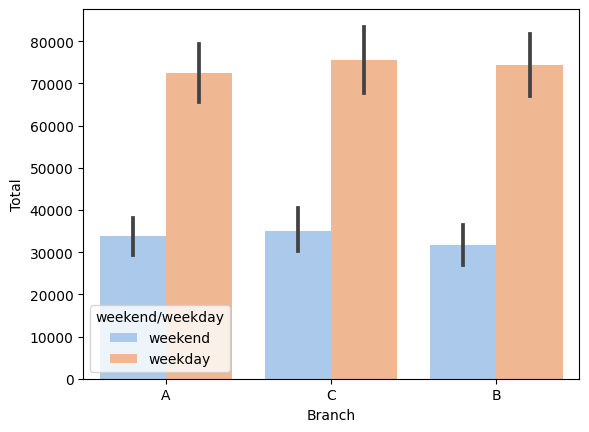

In [42]:
sns.barplot(x="Branch",y="Total",data=df,estimator=sum,palette="pastel",hue="weekend/weekday");

In [43]:
print(df[df["weekend/weekday"]=="weekday"]["Total"].sum().round(2))
print(df[df["weekend/weekday"]=="weekend"]["Total"].sum().round(2))

222388.05
100578.7


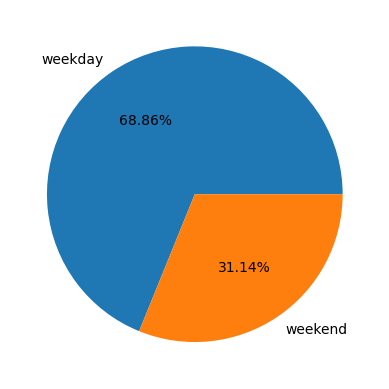

In [44]:
plt.pie([222388.05,100578.7],labels=["weekday","weekend"],autopct="%.2f%%");

In [45]:
df.groupby(["Branch","Month","weekend/weekday"])["Total"].agg(["sum"])

sum
Branch Month    weekend/weekday            
A      February weekday          20417.2395
                weekend           9442.8810
       January  weekday          25736.4870
                weekend          12944.6415
       March    weekday          26274.4125
                weekend          11384.7090
B      February weekday          25964.4525
                weekend           8459.8185
       January  weekday          27634.8870
                weekend           9541.1715
       March    weekday          20898.5805
                weekend          13698.7620
C      February weekday          21950.5020
                weekend          10984.4805
       January  weekday          30470.0550
                weekend           9964.6260
       March    weekday          23041.4310
                weekend          14157.6120

**Популярность продуктов**

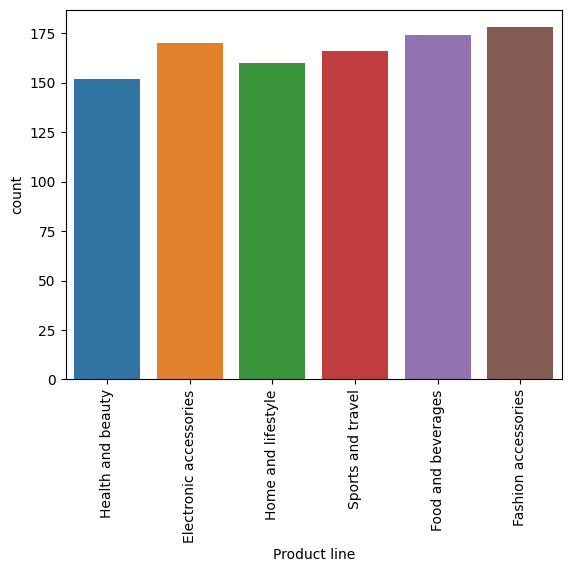

In [46]:
sns.countplot(x="Product line",data=df)
plt.xticks(rotation=90);

По филиалам:

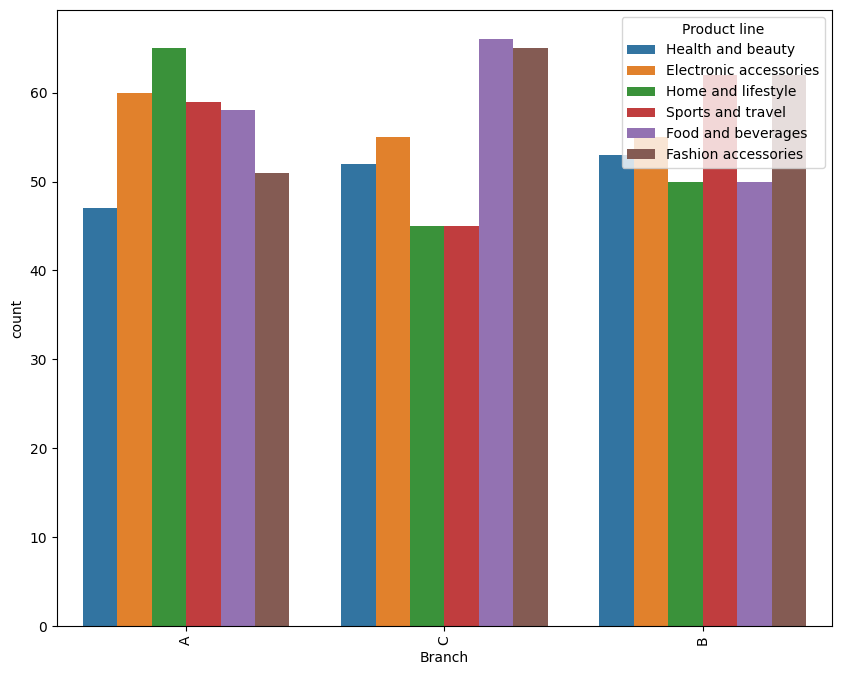

In [47]:
plt.figure(figsize=(10,8))
sns.countplot(x="Branch",data=df,hue="Product line")
plt.xticks(rotation=90);

Еда и напитки, модные аксессуары - самые ходовые продукты. Мы будем продолжать поставки этих продуктов, так как они являются более востребованными и горячо продаваемыми.

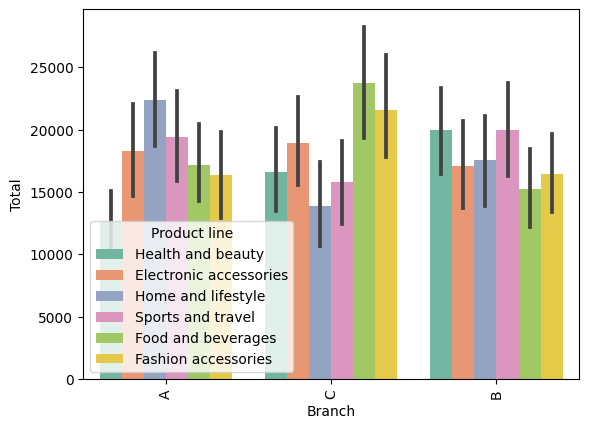

In [48]:
sns.barplot(x="Branch",y="Total",estimator=sum,data=df,palette="Set2",hue="Product line")
plt.xticks(rotation=90);

In [49]:
df.groupby(["Branch","Month"])["Product line"].value_counts()

Branch  Month     Product line          
A       February  Food and beverages        21
                  Electronic accessories    18
                  Fashion accessories       16
                  Sports and travel         14
                  Home and lifestyle        13
                  Health and beauty         12
        January   Home and lifestyle        27
                  Sports and travel         24
                  Electronic accessories    21
                  Fashion accessories       20
                  Food and beverages        15
                  Health and beauty         12
        March     Home and lifestyle        25
                  Health and beauty         23
                  Food and beverages        22
                  Electronic accessories    21
                  Sports and travel         21
                  Fashion accessories       15
B       February  Fashion accessories       24
                  Electronic accessories    19
                  S

**Покупатели**

In [50]:
print("total customers : ",df["Gender"].count())
df["Gender"].value_counts()

total customers :  1000


Female    501
Male      499
Name: Gender, dtype: int64

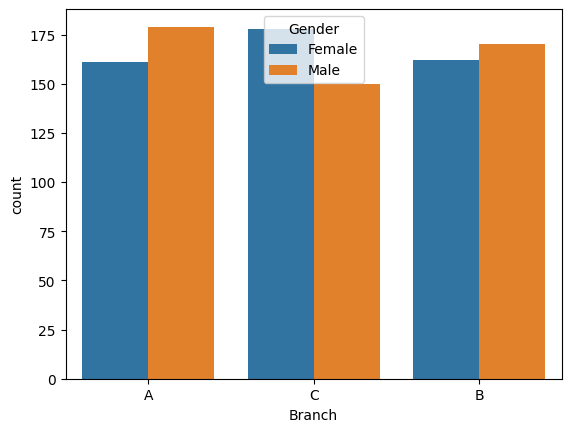

In [51]:
sns.countplot(x="Branch",data=df,hue="Gender");

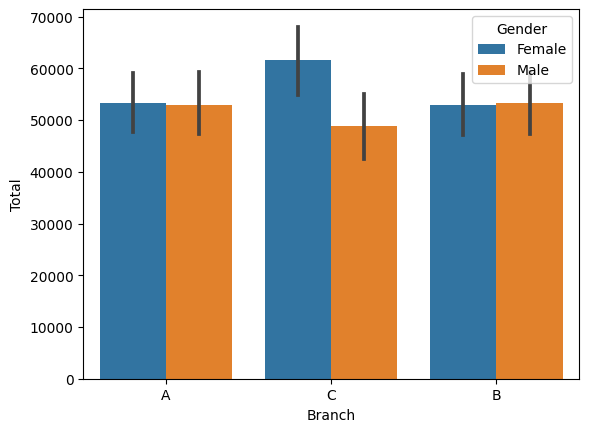

In [52]:
sns.barplot(x="Branch",y="Total",data=df,estimator=sum,hue="Gender");

Наша целевая аудитория - женщины

<Axes: xlabel='Branch', ylabel='Total'>

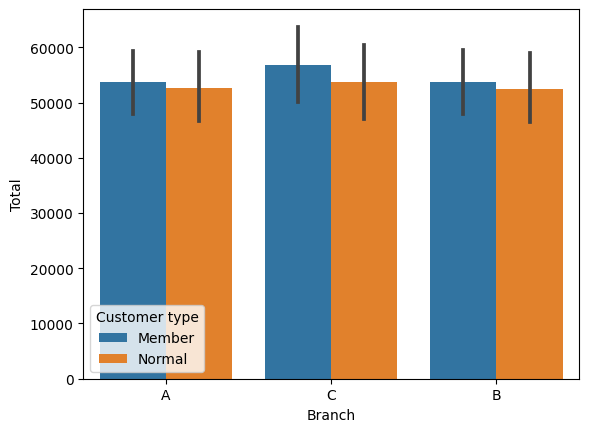

In [53]:
sns.barplot(x="Branch",y="Total",data=df,hue="Customer type",estimator=sum)

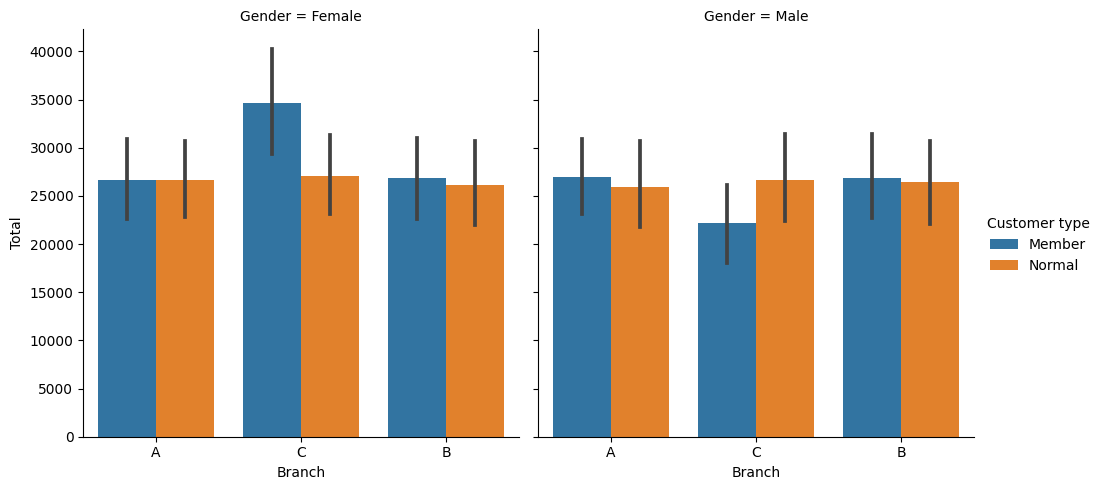

In [54]:
sns.catplot(x="Branch",y="Total",data=df,estimator=sum,hue="Customer type",col="Gender",kind="bar");

- Наибольшее количество членов магазина в филиале "С" приходится на женщин
- Мужчин членов магазина больше всего в филиале "B"

Какие средства платежа используют клиенты?

<Axes: xlabel='Branch', ylabel='count'>

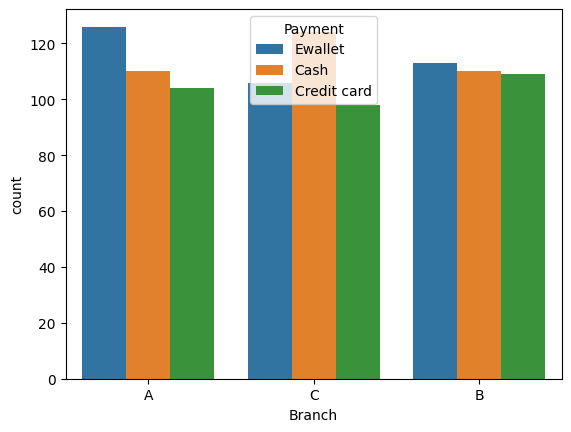

In [55]:
sns.countplot(x="Branch",data=df,hue="Payment")

- В филиале А: электронные средства платежа
- В филиале B: наличка
- В филиале С: Разница между всеми тремя способами оплаты незначительна, но предпочтение было отдано электронному кошельку

График посещения по часам:

<Figure size 1200x1500 with 0 Axes>

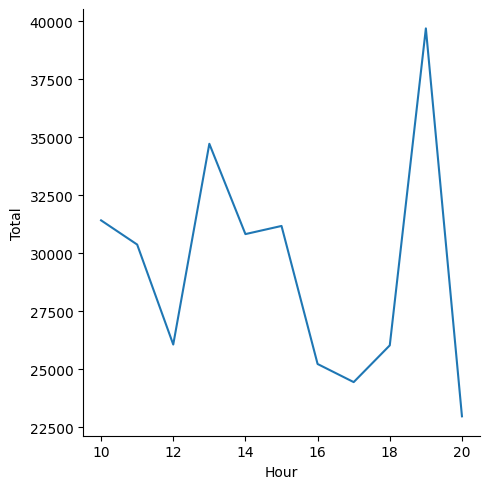

In [56]:
plt.figure(figsize=(12,15))
sns.relplot(x="Hour",y="Total",data=df,estimator=sum,kind="line",ci=None)

**Рейтинг**

Максимальный, минимальный и средний рейтинг магазина

In [57]:
df["Rating"].agg(["max","min","mean"])

max     10.0000
min      4.0000
mean     6.9727
Name: Rating, dtype: float64

Сколько клиентов оценили магазин максимально?

In [58]:
print(len(df[df["Rating"]==10.0]),"customers has given 10 rating")
print(len(df[df["Rating"]==10.0])*100/df["Rating"].count(),"% customers have given")

5 customers has given 10 rating
0.5 % customers have given


Минимальный рейтинг:

In [59]:
print(len(df[df["Rating"]==4.0]),"customers has given minimum rating")
print(len(df[df["Rating"]==4.0])*100/df["Rating"].count(),"% customers have given")

11 customers has given minimum rating
1.1 % customers have given


По филиалам:

In [60]:
df.groupby(["Branch"])["Rating"].agg(["max","min","mean"])

,max,min,mean
Branch,,,
A,10.0,4.0,7.027059
B,10.0,4.0,6.818072
C,10.0,4.0,7.072866


По продукции:

In [61]:
df.groupby(["Product line"])["Rating"].agg(["max","min","mean"])

,max,min,mean
Product line,,,
Electronic accessories,10.0,4.0,6.924706
Fashion accessories,9.9,4.0,7.029213
Food and beverages,9.9,4.0,7.113218
Health and beauty,10.0,4.0,7.003289
Home and lifestyle,9.9,4.1,6.837500
Sports and travel,10.0,4.0,6.916265


In [62]:
df.groupby(["Product line","Branch"])["Rating"].agg(["max","min","mean"])

max  min      mean
Product line           Branch                     
Electronic accessories A        9.9  4.3  6.911667
                       B       10.0  4.0  7.116364
                       C        9.8  4.1  6.747273
Fashion accessories    A        9.9  4.0  6.878431
                       B        9.9  4.1  6.722581
                       C        9.9  4.0  7.440000
Food and beverages     A        9.9  4.0  7.253448
                       B        9.9  4.0  6.994000
                       C        9.9  4.0  7.080303
Health and beauty      A       10.0  4.2  6.900000
                       B        9.9  4.0  7.100000
                       C        9.9  4.1  6.998077
Home and lifestyle     A        9.9  4.1  6.930769
                       B        9.8  4.1  6.516000
                       C        9.8  4.3  7.060000
Sports and travel      A        9.9  4.1  7.257627
                       B       10.0  4.1  6.509677
                       C       10.0  4.0  7.028889

**Выводы** :

* Клиенты довольны продукцией, которую им предоставляет компания, и оставляют положительные отзывы.
* Проданная продукция соответствует ожиданиям клиентов
* Филиал "С" является самым продаваемым и прибыльным филиалом компании
* Компания должна принять меры по увеличению продаж в выходные дни и в других филиалах.